In [198]:
%load_ext autoreload
%autoreload 2

import traceback
from util import *

from han_SA_myalgorithm import algorithm



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [203]:
problem_file = 'alg_test_problems_20240429/TEST_K50_1.json'
#problem_file = 'stage/STAGE1_5.json'
timelimit = 80

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'
    print(traceback.format_exc())


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

{'total_cost': 183423.0,
 'avg_cost': 3668.46,
 'num_drivers': 23,
 'total_dist': 101270,
 'feasible': True,
 'infeasibility': None,
 'bundles': [['BIKE', [5, 13, 7, 18], [5, 13, 7, 18]],
  ['BIKE', [20, 38, 27], [27, 38, 20]],
  ['BIKE', [43, 28, 39, 37], [37, 43, 28, 39]],
  ['WALK', [22], [22]],
  ['WALK', [16], [16]],
  ['WALK', [42], [42]],
  ['WALK', [19], [19]],
  ['WALK', [12], [12]],
  ['WALK', [26], [26]],
  ['BIKE', [14, 32, 30], [14, 32, 30]],
  ['BIKE', [46, 41, 40], [41, 40, 46]],
  ['BIKE', [23, 47], [47, 23]],
  ['BIKE', [8, 6, 2], [2, 8, 6]],
  ['BIKE', [36, 35, 25], [25, 35, 36]],
  ['BIKE', [48, 44], [44, 48]],
  ['CAR', [3, 11], [11, 3]],
  ['CAR', [9, 4], [9, 4]],
  ['CAR', [24, 33], [24, 33]],
  ['CAR', [29, 49], [49, 29]],
  ['CAR', [45], [45]],
  ['WALK', [0, 10], [0, 10]],
  ['CAR', [1, 15, 17], [1, 15, 17]],
  ['BIKE', [21, 34, 31], [21, 31, 34]]],
 'time': 76.85498666763306,
 'timelimit_exception': False,
 'exception': None,
 'prob_name': 'TEST_K50_1',
 'prob

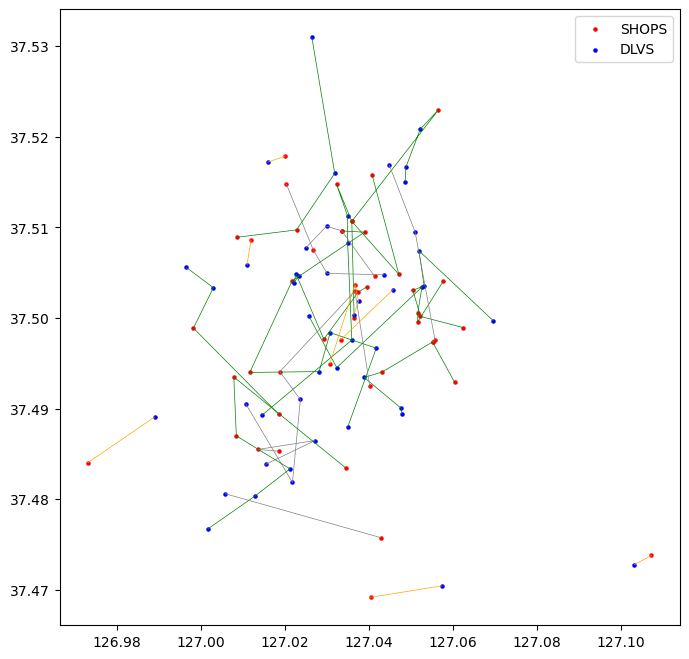

In [204]:
draw_route_solution(ALL_ORDERS, checked_solution)

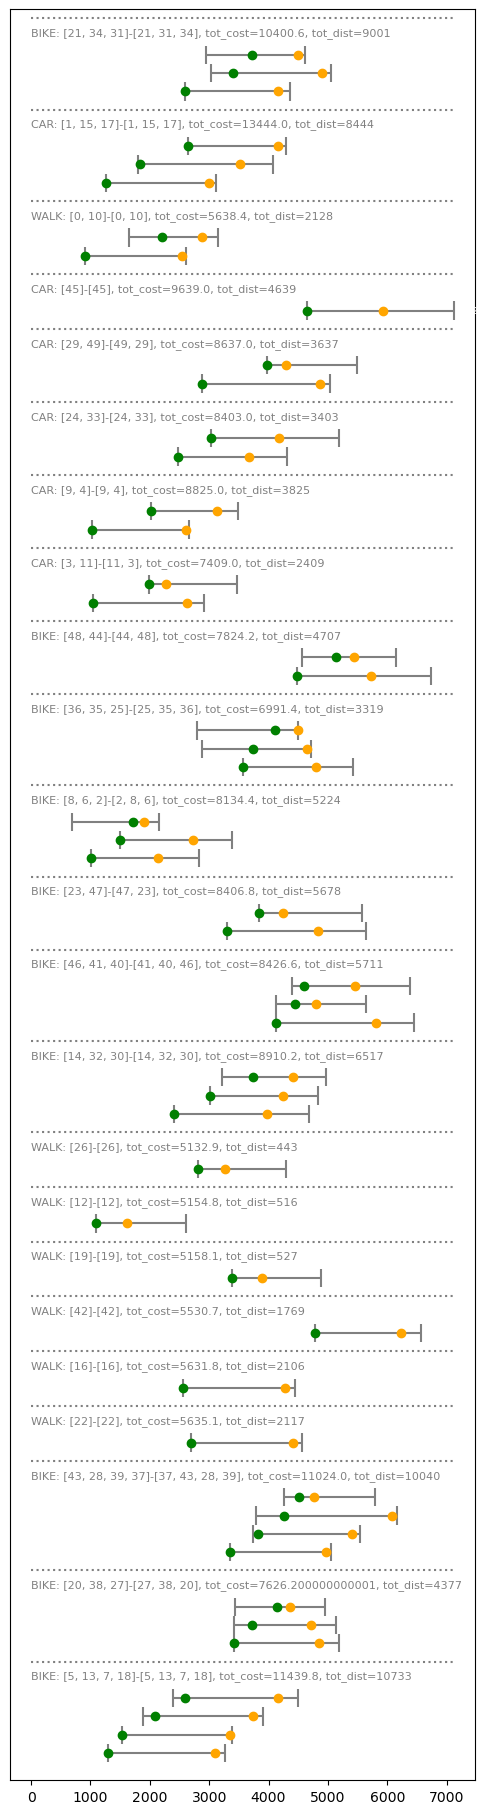

In [205]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)